# Higher Diploma in Science in Computing (Data Analytics): Machine Learning & Statistics

## Claire Drummond  - G00364781

## An Analysis of the Boston House Price Data Set

The objective of this report is to analsye the Boston House Price Data Set, covering the following areas:

- Describe: Good summary of the dataset, repository well laid-out and organised. Reasonable commits to the repository.
- Infer: Appropriate analysis of the relationship between the median house price and whether the house borders the river, with good explanations of the analysis.
- Predict: Well-trained neural network providing decent predictions of house prices based on the other variables. Good explanations of how to use the neural network and how it works.

This report is to be presented to key stakeholders in an organsiation.  From experience, I have learned the best way to do this is to present the information and then followup with the 'key take away point'. This sets the structure of this Jupyter Notebook and hence does not delve too deeply into statisitics and mathamatical explanations

# Project Plan - Boston House Price Index
## Objectives
- Section 1: Import the Boston House Price Dataset.  Using descriptive statisitcs, analyse the dataset.  Highlight areas of interest
- Section 2: Inferential Statistics.  Focus on the relationship between the median house price and the location of the house (borders the river or not)
- Section 3: Well-trained neural network providing decent predictions of house prices based on the other variables. Good explanations of how to use the neural network and how it works. 

# 1.1 Descriptive Statistics

# What is the Boston House Price Index
The Boston Housing Dataset consists of price of houses in various places in Boston. Alongside with price, the dataset also provide information such as Crime (CRIM), areas of non-retail business in the town (INDUS), the age of people who own the house (AGE), and there are many other attributes.


# Data description
The Boston data frame has 506 rows and 13 columns, 14 columns after I add the medv to the dataframe.

## Housing Values in Suburbs of Boston
### The medv variable is the target variable.

# This data frame contains the following columns:

- crim: per capita crime rate by town.
- zn: proportion of residential land zoned for lots over 25,000 sq.ft.
- indus: proportion of non-retail business acres per town.
- chas: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
- nox: nitrogen oxides concentration (parts per 10 million).
- rm: average number of rooms per dwelling.
- age: proportion of owner-occupied units built prior to 1940.
- dis: weighted mean of distances to five Boston employment centres.
- rad: index of accessibility to radial highways.
- tax: full-value property-tax rate per 10,000 dollars
- ptratio: pupil-teacher ratio by town.
- black: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.
- lstat: lower status of the population (percent).
- medv: median value of owner-occupied homes in $1000s.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

%matplotlib inline

### The dataset consists of a table - columns are attributes, rows are instances (individual observations). 
### In order to do computations easily and efficiently we can use pandas. So the first step is to obtain the dataset and load it into a DataFrame.

In [2]:
#Import Boston House Price Data Set
from sklearn.datasets import load_boston 
boston_dataset = load_boston()

In [3]:
#Print the numbers of columns and number of rows in dataset.
print(boston_dataset.data.shape)

(506, 13)


In [4]:
# create a dataframe called df with the data from the dataset
df = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)

In [5]:
# show the head of the dataset
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


### We do not have the mdev variable. We must add this to the dataframe

In [6]:
# add the median value to the dataframe
df["MEDV"] = boston_dataset.target

In [7]:
# now show the head of the dataset wich has the 14 columns
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [8]:
#Check if the dataset is missing values and all is in order for analysis
pd.isnull(df).any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
MEDV       False
dtype: bool

### There are no missing values in this dataset

###  How are the values of each attribute distributed. We can readily use the basic statistics (count, mean, min, max, quartiles) via the pandas df.describe() function

In [9]:
# display some descriptive statistics
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Rearrange layout of discriptive statistics

In [10]:
summary = df.describe()
summary = summary.transpose()
summary

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


### The table above highlights important information about the variables in the dataset.
### It is an excellent reference guide.  However in order to understand the variables, we need to understand the relationship between the variables.  If a correlation exits?
### Remember what the target variable is: medv: median value of owner-occupied homes in €1000's
### Key questions to be asked at this stage are - what is the distribution of the target variable? What correlation exists between the target variable and other variables?  Is there correrlation between variables other than the target variable?

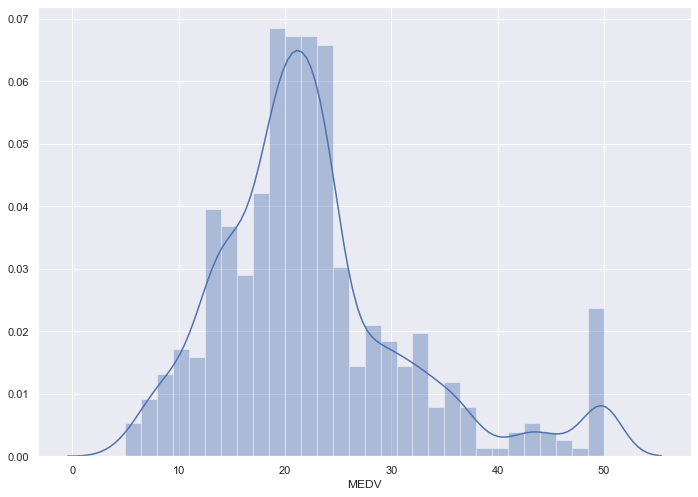

In [11]:
#Plot the distribution of the target variable MEDV using the distplot function from the seaborn library

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df['MEDV'], bins=30)
plt.show()

<font color=red>KEY TAKE AWAY: This visualises the distribution of the target variable. The house prices are not normally distributed and are right skewed.</font>

# Correlation

It is useful to know whether some pairs of attributes are correlated and how much. For many machine learning algorithms correlated features might make some trouble, ideally we should try to get a set of independent features.

In [12]:
#create table that shows the correlation between variables
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


### This returns another DataFrame with pairs of all attributes and values in range [-1; 1], 1 meaning total correlation, -1 negative correlation, 0 no correlation.  This matrix is best visualised in the form of a heat map

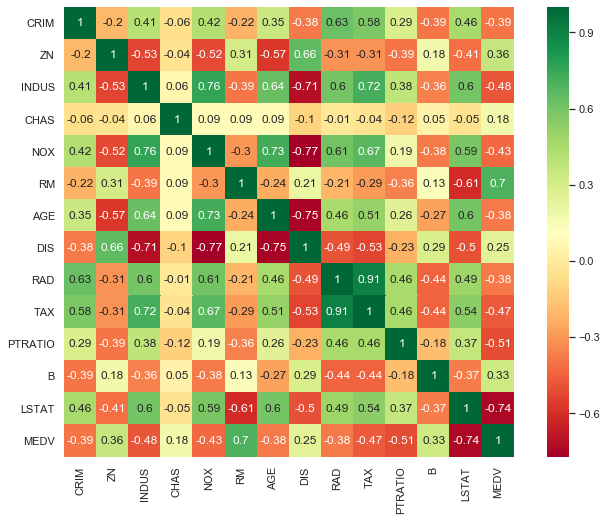

In [13]:
# correlation matrix that measures the linear relationships between the variables
# correlation matrix can be formed by using the corr function from the pandas dataframe library
# use the heatmap function from the seaborn library to plot the correlation matrix.

correlation_matrix = df.corr().round(2)
# annot = True to print the values inside the square
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(data=correlation_matrix, square=True, cmap='RdYlGn', annot=True)

### The correlation coefficient ranges from -1 to 1. 
### If the value is close to 1, it means that there is a strong positive correlation between the two variables. 
### When it is close to -1, the variables have a strong negative correlation.

<font color=red>KEY TAKE AWAY: From the above correlation plot, we can see that MEDV is strongly correlated to LSTAT, RM</font>

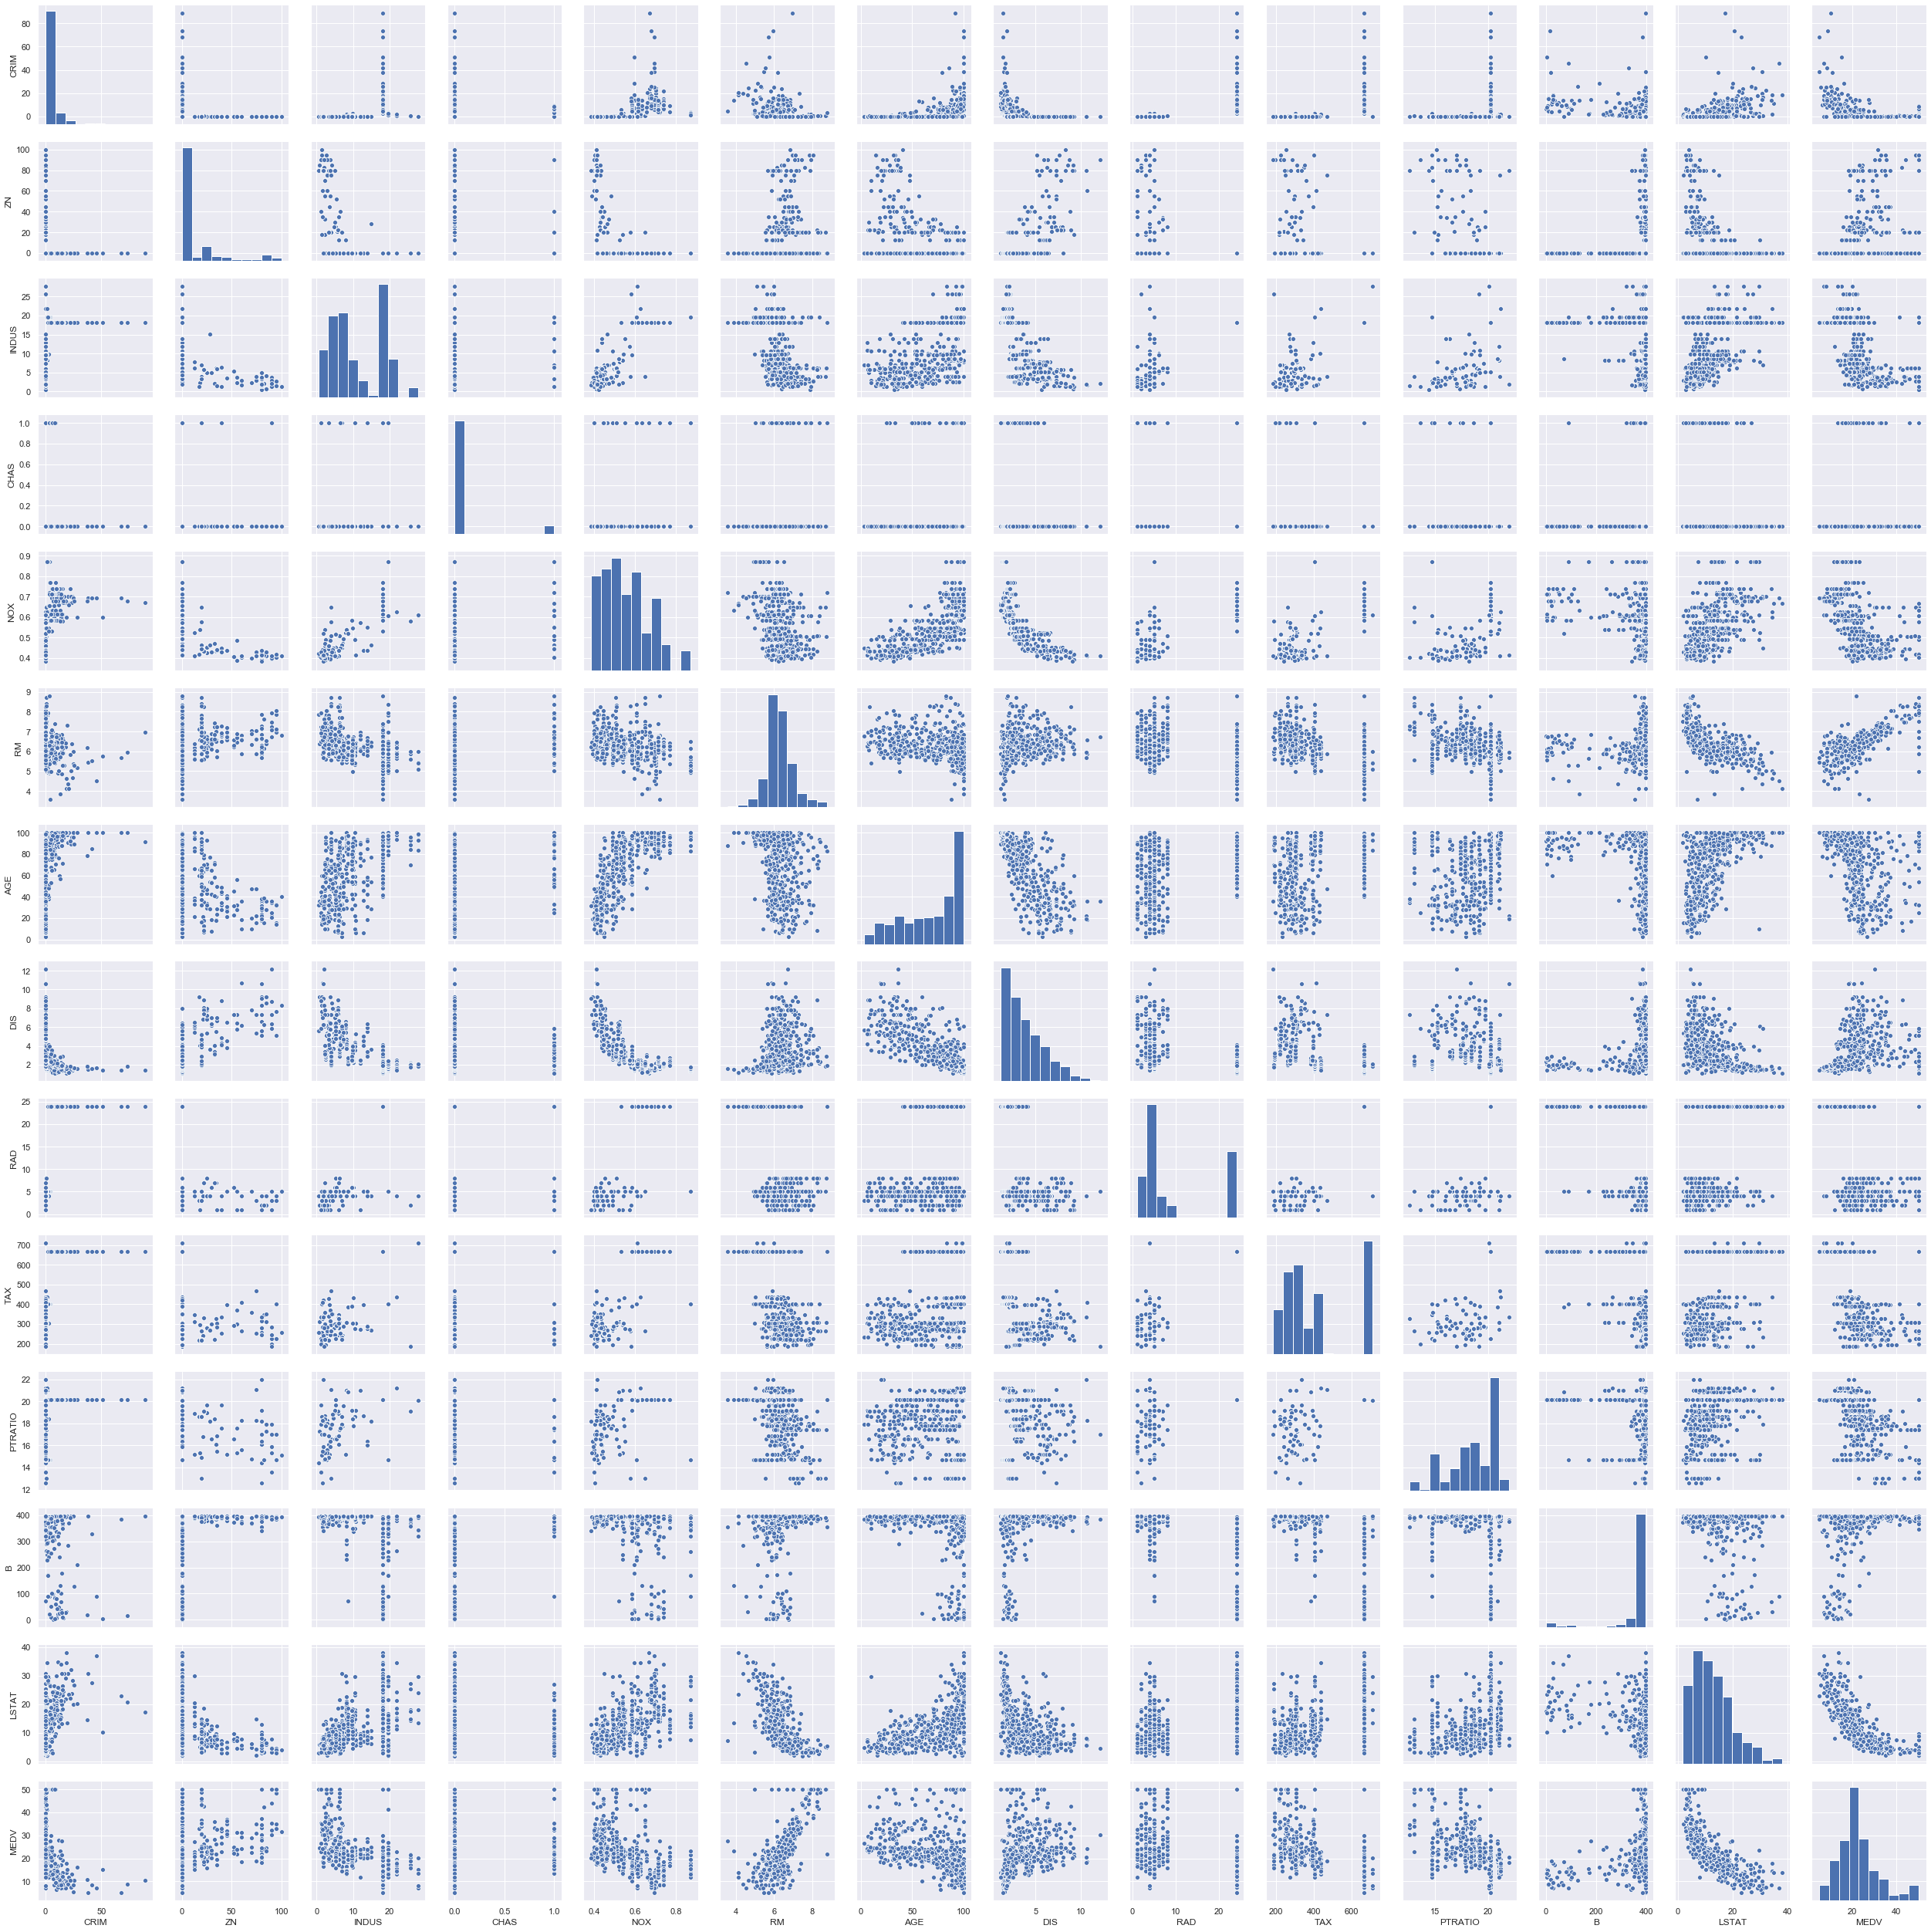

In [14]:
# pair plot to visualise the correlations
sns.pairplot(df)

### The pairplots contain a lot of information & is difficult to read - I will focus on what I feel are the key plots later in the document.
### Besides correlation between attributes, we'd like to know the correlation between input attributes and the target one.
### How each input attribute is able to predict the target. It is called predictivity.

In [15]:
# Ref:http://www.neural.cz/dataset-exploration-boston-house-pricing.html
pearson = df.corr(method='pearson')
# assume target attr is the last, then remove corr with itself
corr_with_target = pearson.iloc[-1][:-1]
corr_with_target[abs(corr_with_target).argsort()[::-1]]

LSTAT     -0.737663
RM         0.695360
PTRATIO   -0.507787
INDUS     -0.483725
TAX       -0.468536
NOX       -0.427321
CRIM      -0.388305
RAD       -0.381626
AGE       -0.376955
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
Name: MEDV, dtype: float64

<font color=red>KEY TAKE AWAY: Confirmation that MEDV is strongly correlated to LSTAT, RM</font>

### Lets focus on the variables MEDV, RM, LSTAT as these seem to be the features of interest.  What can data analysis tell us.

In [16]:
# Create a new dataframe
medvdf = df[["MEDV", "RM", "LSTAT"]]
# View first 14 rows of new df
medvdf.head(14)


,MEDV,RM,LSTAT
0,24.0,6.575,4.98
1,21.6,6.421,9.14
2,34.7,7.185,4.03
3,33.4,6.998,2.94
4,36.2,7.147,5.33
5,28.7,6.430,5.21
6,22.9,6.012,12.43
7,27.1,6.172,19.15
8,16.5,5.631,29.93
9,18.9,6.004,17.10


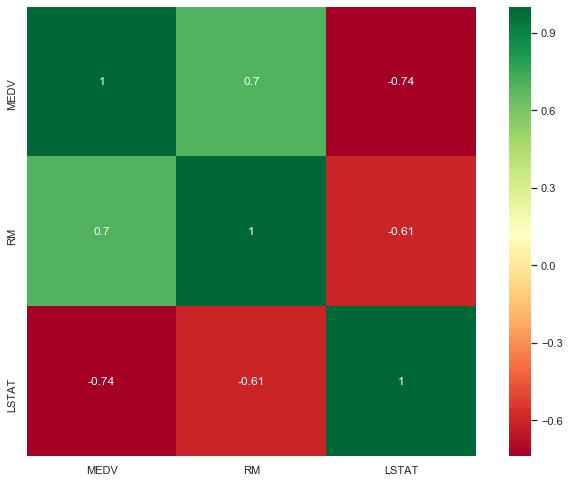

In [17]:
correlation_matrix = medvdf.corr().round(2)
# annot = True to print the values inside the square
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(data=correlation_matrix, square=True, cmap='RdYlGn', annot=True)

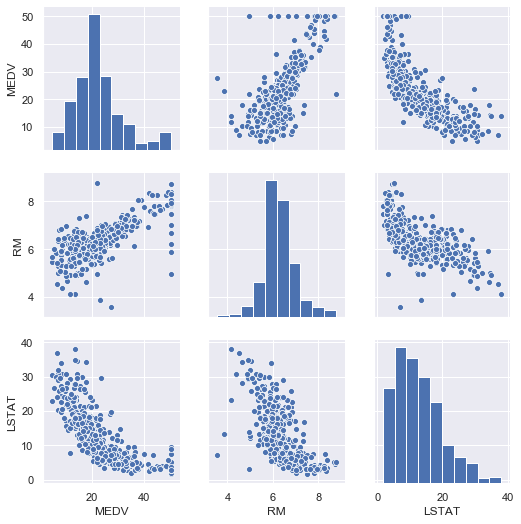

In [18]:
# pair plot to visualise the correlations
sns.pairplot(medvdf)

### Note how the number of rooms per house (RM) and the % of the population that is lower class (LSTAT) are highly correlated with the median house value (MDEV). Let's pose the following question: how well can we predict MDEV given these variables?

### To help answer this, let's first visualize the relationships using Seaborn. We will draw the scatter plots along with the line of best fit linear models.

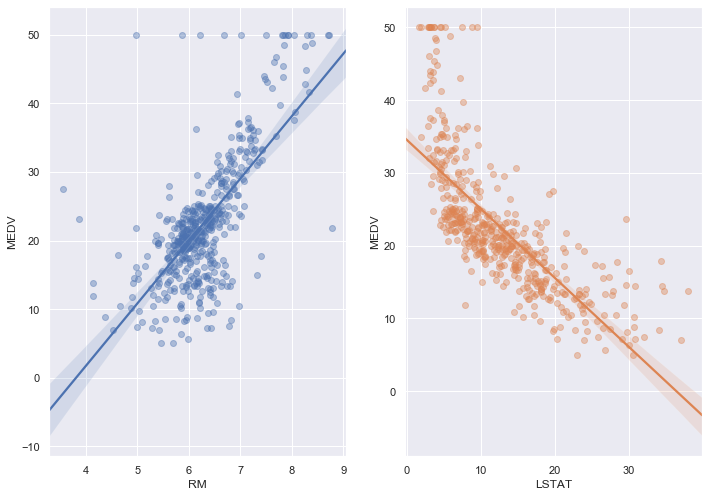

In [19]:
# draw the scatter plots along with the line of best fit linear models.
fig, ax = plt.subplots(1, 2)
sns.regplot('RM', 'MEDV', df, ax=ax[0],
scatter_kws={'alpha': 0.4})
sns.regplot('LSTAT', 'MEDV', df, ax=ax[1],
scatter_kws={'alpha': 0.4})

The line of best fit is calculated by minimizing the ordinary least squares error function, something Seaborn does automatically when we call the regplot function. Also note the shaded areas around the lines, which represent 95% confidence intervals.

<font color=red>KEY TAKE AWAY:There is a good linear correlation between house prices and number of rooms. I have plotted the best fit line with the data.  It shows there is a linear relationship between the varaible as there is an equal spread of data points either side of the line and this condition holds true the entire length of the line.</font> 

<font color=red>KEY TAKE AWAY:Looking at the relationship between the % lower status population and median house price. The initial analysis hinted at a strong correlation but when it is plotted in the pair plot - it is obvious that the relationship is not linear. The best fit line tells us that all of the points  below the line are clustered in the same region. A curve might make a better fit.</font>

### It might be interesting to select some strong correlations between attribute pairs

In [20]:
# Code adapted from http://www.neural.cz/dataset-exploration-boston-house-pricing.html
from ipykernel import kernelapp as app
pearson = df.corr(method='pearson')
attrs = pearson.iloc[:-1,:-1] # all except target
# only important correlations and not auto-correlations
threshold = 0.5
# {('LSTAT', 'TAX'): 0.543993, ('INDUS', 'RAD'): 0.595129, ...
important_corrs = (attrs[abs(attrs) > threshold][attrs != 1.0]) \
    .unstack().dropna().to_dict()
#     attribute pair  correlation
# 0     (AGE, INDUS)     0.644779
# 1     (INDUS, RAD)     0.595129
# ...
unique_important_corrs = pd.DataFrame(
    list(set([(tuple(sorted(key)), important_corrs[key]) \
    for key in important_corrs])), columns=['attribute pair', 'correlation'])
# sorted by absolute value
unique_important_corrs = unique_important_corrs.loc[
    abs(unique_important_corrs['correlation']).argsort()[::-1]]

In [21]:
unique_important_corrs

,attribute pair,correlation
1,"(RAD, TAX)",0.910228
18,"(DIS, NOX)",-0.769230
10,"(INDUS, NOX)",0.763651
14,"(AGE, DIS)",-0.747881
6,"(AGE, NOX)",0.731470
7,"(INDUS, TAX)",0.720760
19,"(DIS, INDUS)",-0.708027
9,"(NOX, TAX)",0.668023
21,"(DIS, ZN)",0.664408
5,"(AGE, INDUS)",0.644779


There is a strong positive correlation between the rad: index of accessibility to radial highways and the tax: full-value property-tax rate per 10,000 dollars

There is a strong negative correlation between nox: nitrogen oxides concentration (parts per 10 million) and 
dis: weighted mean of distances to five Boston employment centres.


<font color=red>KEY TAKE AWAY:Further discriptive analysis that can be done on the various variables in the dataset.  For now, we will move onto inferential statisitcs.

# Inferential Statistics

Inferential statistics are produced through complex mathematical calculations that allow us to infer trends about a larger population based on a study of a sample taken from it. We use inferential statistics to examine the relationships between variables within a sample and then make generalizations or predictions about how those variables will relate to a larger population.

Techniques that social scientists use to examine the relationships between variables, and thereby to create inferential statistics, include linear regression analyses, logistic regression analyses, ANOVA, correlation analyses, structural equation modeling, and survival analysis. When conducting research using inferential statistics, scientists conduct a test of significance to determine whether they can generalize their results to a larger population. Common tests of significance include the chi-square and t-test. These tell us the probability that the results of the analysis of the sample are representative of the population as a whole.

For the purpose of this dataset I conduct the following analysis:
ANOVA
T-Test

ANOVA

When an issue arises where we can't use a t-test, we use ANOVA
Analysis of Variance, or ANOVA for short, is a statistical test that looks for significant differences between means on a particular measure. For example, say you are interested in studying the education level of athletes in a community, so you survey people on various teams. You start to wonder, however, if the education level is different among the different teams. You could use an ANOVA to determine if the mean education level is different among the football team versus the rugby team versus the hurling team.

https://www.thoughtco.com/analysis-of-variance-anova-3026693
The mean is calculated for each of your groups. Using the example of education and sports teams from the introduction in the first paragraph above, the mean education level is calculated for each sports team.
The overall mean is then calculated for all of the groups combined.
Within each group, the total deviation of each individual’s score from the group mean is calculated. This tells us whether the individuals in the group tend to have similar scores or whether there is a lot of variability between different people in the same group. Statisticians call this within group variation.
Next, how much each group mean deviates from the overall mean is calculated. This is called between group variation.
Finally, an F statistic is calculated, which is the ratio of between group variation to the within group variation.
If there is significantly greater between group variation than within group variation (in other words, when the F statistic is larger), then it is likely that the difference between the groups is statistically significant. 

For the purpose of this project, we must focus on weather there is signficant difference in median house prices between house prices that are along the Charles river and those that arent.

Lets look at how spread of the median house values in total.  

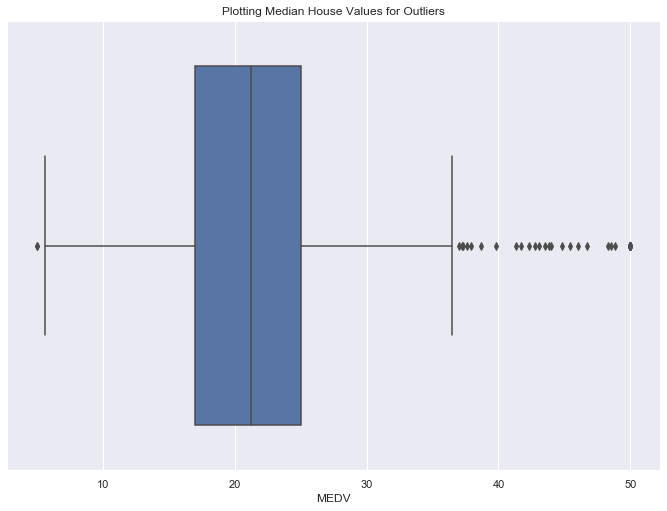

In [22]:
ax = sns.boxplot(x=df["MEDV"]).set_title('Plotting Median House Values for Outliers')

<font color=red>KEY TAKE AWAY: There are a large number of outliers at the upper end of the scale.  This may screw some results in inferential statisitcs such as the t-test.

In [23]:
# Splitting the dataframe into two - houses that are along the charles river and house that arent
df_nearriver = df[df["CHAS"]==1]
df_farriver = df[df["CHAS"]==0]

mean_far = df_nearriver["MEDV"].mean()
print(mean_far)

28.44


In [24]:
mean_near = df_farriver["MEDV"].mean()
print(mean_near)


22.093842887473482


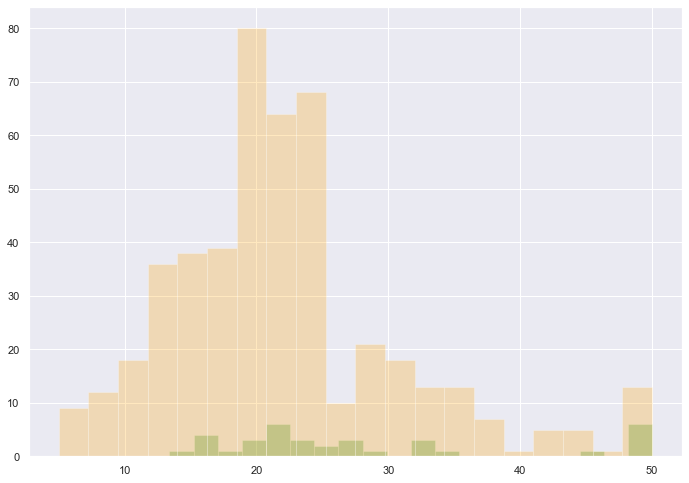

In [25]:
# Splitting the dataframe into two - houses that are along the charles river and house that arent
df_nearriver = df[df["CHAS"]==1]
df_farriver = df[df["CHAS"]==0]

plt.hist(df_nearriver["MEDV"], bins=20, color='green', alpha=0.25, label="Near River")
plt.hist(df_farriver["MEDV"], bins=20, color='orange', alpha=0.25, label = "Not Along River")
plt.show()

<font color=red>KEY TAKE AWAY: The house prices of houses not along the river are normally distributed around the mean of 22,0000 dollars. The prices of houses that are along the Charles river do not have a normal distribution around the mean of 28,000 dollars.   The mean in this instance in being inflated due to a higher proportion of data points that have much higher house prices</font>

A one-way between groups ANOVA is used when you want to test the difference between two or more groups. It is called a one-way ANOVA because there is only one variable that is being used to divide participants into different groups. In this case it is median value of the house.

In [26]:
#oneway anova
import scipy.stats as stats
stats.f_oneway(df_farriver['MEDV'], df_nearriver['MEDV'])

F_onewayResult(statistic=15.971512420371955, pvalue=7.390623170520815e-05)

In [27]:
# import the package for performing Z Test
from statsmodels.stats.weightstats import ztest
# Convert into two arrays
X2 = np.array(df_farriver.MEDV)
Y2 = np.array(df_nearriver.MEDV)
ztest(Y2,x2=None,value = mean_far)

(-1.778689348649516e-15, 0.9999999999999986)

We use a z-test to check if it is statistically significant.  z-test is used when the sample is greater than 30 (house near river are 35 number)

In [28]:
#Calculate the independent samples t-statistic for the samples

import scipy.stats as stats
stats.ttest_ind(df_nearriver["MEDV"], df_farriver["MEDV"])

Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)

# Neural Network

# What is a Neural Network
Neural networks are a set of algorithms, modeled loosely after the human brain, that are designed to recognize patterns. They interpret sensory data through a kind of machine perception, labeling or clustering raw input. The patterns they recognize are numerical, contained in vectors, into which all real-world data, be it images, sound, text or time series, must be translated.

Deep learning maps inputs to outputs. It finds correlations. It is known as a “universal approximator”, because it can learn to approximate an unknown function f(x) = y between any input x and any output y, assuming they are related at all (by correlation or causation, for example). In the process of learning, a neural network finds the right f, or the correct manner of transforming x into y, whether that be f(x) = 3x + 12 or f(x) = 9x - 0.1.

### Classification
All classification tasks depend upon labeled datasets; that is, humans must transfer their knowledge to the dataset in order for a neural network to learn the correlation between labels and data. This is known as supervised learning.

### Clustering
Clustering or grouping is the detection of similarities. Deep learning does not require labels to detect similarities. Learning without labels is called unsupervised learning. Unlabeled data is the majority of data in the world. One law of machine learning is: the more data an algorithm can train on, the more accurate it will be. Therefore, unsupervised learning has the potential to produce highly accurate models

### Predictive Analytics: Regressions
With classification, deep learning is able to establish correlations between, say, pixels in an image and the name of a person. You might call this a static prediction. By the same token, exposed to enough of the right data, deep learning is able to establish correlations between present events and future events. It can run regression between the past and the future. The future event is like the label in a sense. Deep learning doesn’t necessarily care about time, or the fact that something hasn’t happened yet. Given a time series, deep learning may read a string of number and predict the number most likely to occur next.

# Neural Network Elements
Deep learning is the name we use for “stacked neural networks”; that is, networks composed of several layers

Neural networks modify themselves as they learn from their robust initial training and then from ongoing self-learning that they experience by processing additional information. A simple learning model applied by neural networks is the process of weighting input streams in favour of those most likely to be accurate. That means a preference is put on the input streams that have a higher weight; and the higher the weight, the more influence that unit has on another. The process of reducing predictable errors through weight, is done through gradient descent algorithms. Finally, output units are the end part of the process; this is where the network responds to the data that was put in initially, and can now be processed.

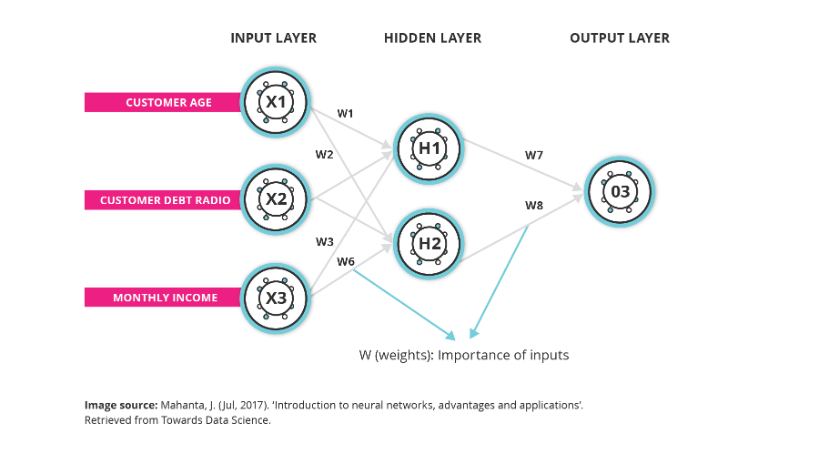

# Exploring and Processing the Data
Before we code any Machine Learning algorithm, we must format the data

- Read in the CSV (comma separated values) file and convert them to arrays.  
- Split our dataset into the input features (which we call x) and the label (which we call y).
- Scale the data (we call this normalization) so that the input features have similar orders of magnitude.
- Split our dataset into the training set and the test set. 

In [29]:
import keras as kr

Using TensorFlow backend.


In [30]:
# resize plots
plt.rcParams['figure.figsize'] = (10, 10)

We now split our dataset into input features (X) and the feature we wish to predict (Y). To do that split, we simply assign the first 10 columns of our array to a variable called X and the last column of our array to a variable called Y. The code to do the first assignment is this:

X = dataset[:,0:10]

Before we build the model, we must do the following:
- Split the data into training data and test data (80/20).  An algorithm should make new predictions based on new data.  In order to simulate this,  we splitting the dataset into training data and test data.
- Make a distinction between features (inputs) and targets (outputs)
- Normalisation

In [31]:
# Load data and Pre-processing
# We will use the code from scikit-learn called ‘train_test_split’,
# splits our dataset into a training set and a test set.
boston_housing = kr.datasets.boston_housing
(train_data, train_target), (test_data, test_target) = boston_housing.load_data()

# Shuffle the training set and split to training and testing data
order = np.argsort(np.random.random(train_target.shape))
train_data = train_data[order]
train_target = train_target[order]

print("Training Set Size: {}".format(train_data.shape))
print("Testing Set Size: {}".format(test_data.shape))
print("The first dataset：\n", train_data[0])
print("The second dataset：\n", train_data[1])



Training Set Size: (404, 13)
Testing Set Size: (102, 13)
The first dataset：
 [  0.55778   0.       21.89      0.        0.624     6.335    98.2
   2.1107    4.      437.       21.2     394.67     16.96   ]
The second dataset：
 [  5.87205   0.       18.1       0.        0.693     6.405    96.
   1.6768   24.      666.       20.2     396.9      19.37   ]


In [32]:
# Make column name for each feature and print first 5 row of dataset and first 10 train target
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
df = pd.DataFrame(train_data, columns=column_names)
print(df.head())
print(train_target[0:10])


      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS   RAD    TAX  \
0  0.55778   0.0  21.89   0.0  0.624  6.335  98.2  2.1107   4.0  437.0   
1  5.87205   0.0  18.10   0.0  0.693  6.405  96.0  1.6768  24.0  666.0   
2  4.81213   0.0  18.10   0.0  0.713  6.701  90.0  2.5975  24.0  666.0   
3  5.58107   0.0  18.10   0.0  0.713  6.436  87.9  2.3158  24.0  666.0   
4  0.02177  82.5   2.03   0.0  0.415  7.610  15.7  6.2700   2.0  348.0   

   PTRATIO       B  LSTAT  
0     21.2  394.67  16.96  
1     20.2  396.90  19.37  
2     20.2  255.23  16.42  
3     20.2  100.19  16.22  
4     14.7  395.38   3.11  
[18.1 12.5 16.4 14.3 42.3 24.7 19.4 14.6 18.3  7.2]


In [33]:
# Calculate the mean and standard deviation by column as train data and test data usage
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)
train_data = (train_data - mean) / std
test_data = (test_data - mean) / std
print(train_data[0])  # First training sample , normalized
print(test_data[0])  # First test sample , normalized

[-0.34534946 -0.48361547  1.58544339 -0.25683275  0.56888847  0.09580687
  1.04598617 -0.80365458 -0.62624905  0.18716835  1.23950646  0.42435237
  0.58231285]
[ 1.55369355 -0.48361547  1.0283258  -0.25683275  1.03838067  0.23545815
  1.11048828 -0.93976936  1.67588577  1.5652875   0.78447637 -3.48459553
  2.25092074]


In [53]:

# Define model
# The first layer has 896: (13+1)*64 parameters
# The second layer has 4160: (64+1)*64 parameters
# The third layer has 65: (64+1)* parameters

m = kr.models.Sequential()
m.add(kr.layers.Dense(64, activation='linear', input_shape=(train_data.shape[1],)))
m.add(kr.layers.Dense(64, activation='linear'))
m.add(kr.layers.Dense(1, activation='linear'))
  
m.compile(loss='mean_squared_error', optimizer='adam') # metrics=['mean_absolute_error'])
    

#model = build_model
#model.summary()
                                                             


In [61]:
m.fit(train_data, train_target, epochs=1000, batch_size=10)

Epoch 1/1000
404/404 [==============================] - 0s 81us/step - loss: 23.3192
Epoch 2/1000
404/404 [==============================] - 0s 81us/step - loss: 23.6315
Epoch 3/1000
404/404 [==============================] - 0s 86us/step - loss: 23.1157
Epoch 4/1000
404/404 [==============================] - 0s 86us/step - loss: 23.5500
Epoch 5/1000
404/404 [==============================] - 0s 91us/step - loss: 23.4680
Epoch 6/1000
404/404 [==============================] - 0s 89us/step - loss: 23.2978
Epoch 7/1000
404/404 [==============================] - 0s 91us/step - loss: 22.9491
Epoch 8/1000
404/404 [==============================] - 0s 91us/step - loss: 23.3821
Epoch 9/1000
404/404 [==============================] - 0s 84us/step - loss: 23.6342
Epoch 10/1000
404/404 [==============================] - 0s 91us/step - loss: 23.4195
Epoch 11/1000
404/404 [==============================] - 0s 91us/step - loss: 23.6817
Epoch 12/1000
404/404 [==============================] - 0s 94u

404/404 [==============================] - 0s 74us/step - loss: 22.8456
Epoch 97/1000
404/404 [==============================] - 0s 81us/step - loss: 24.2710
Epoch 98/1000
404/404 [==============================] - 0s 72us/step - loss: 23.2531
Epoch 99/1000
404/404 [==============================] - 0s 72us/step - loss: 23.1764
Epoch 100/1000
404/404 [==============================] - 0s 69us/step - loss: 23.2905
Epoch 101/1000
404/404 [==============================] - 0s 77us/step - loss: 22.9206
Epoch 102/1000
404/404 [==============================] - 0s 72us/step - loss: 23.2210
Epoch 103/1000
404/404 [==============================] - 0s 74us/step - loss: 23.4012
Epoch 104/1000
404/404 [==============================] - 0s 74us/step - loss: 23.2278
Epoch 105/1000
404/404 [==============================] - 0s 72us/step - loss: 24.4404
Epoch 106/1000
404/404 [==============================] - 0s 72us/step - loss: 23.6335
Epoch 107/1000
404/404 [==============================] - 0s 

404/404 [==============================] - 0s 77us/step - loss: 23.2353
Epoch 191/1000
404/404 [==============================] - 0s 74us/step - loss: 22.7121
Epoch 192/1000
404/404 [==============================] - 0s 81us/step - loss: 23.6160
Epoch 193/1000
404/404 [==============================] - 0s 106us/step - loss: 23.2365
Epoch 194/1000
404/404 [==============================] - 0s 123us/step - loss: 23.3810
Epoch 195/1000
404/404 [==============================] - 0s 91us/step - loss: 23.3246
Epoch 196/1000
404/404 [==============================] - 0s 81us/step - loss: 23.6194
Epoch 197/1000
404/404 [==============================] - 0s 79us/step - loss: 23.6036
Epoch 198/1000
404/404 [==============================] - 0s 77us/step - loss: 22.7696
Epoch 199/1000
404/404 [==============================] - 0s 74us/step - loss: 23.2354
Epoch 200/1000
404/404 [==============================] - 0s 72us/step - loss: 23.2758
Epoch 201/1000
404/404 [==============================] 

404/404 [==============================] - 0s 79us/step - loss: 22.9823
Epoch 285/1000
404/404 [==============================] - 0s 79us/step - loss: 23.0947
Epoch 286/1000
404/404 [==============================] - 0s 79us/step - loss: 23.0493
Epoch 287/1000
404/404 [==============================] - 0s 77us/step - loss: 22.6996
Epoch 288/1000
404/404 [==============================] - 0s 79us/step - loss: 23.2181
Epoch 289/1000
404/404 [==============================] - 0s 81us/step - loss: 23.2828
Epoch 290/1000
404/404 [==============================] - 0s 79us/step - loss: 23.0577
Epoch 291/1000
404/404 [==============================] - 0s 111us/step - loss: 23.7141
Epoch 292/1000
404/404 [==============================] - 0s 114us/step - loss: 22.9343
Epoch 293/1000
404/404 [==============================] - 0s 106us/step - loss: 23.3094
Epoch 294/1000
404/404 [==============================] - 0s 77us/step - loss: 22.8658
Epoch 295/1000
404/404 [==============================]

404/404 [==============================] - 0s 79us/step - loss: 23.2683
Epoch 379/1000
404/404 [==============================] - 0s 79us/step - loss: 23.2833
Epoch 380/1000
404/404 [==============================] - 0s 72us/step - loss: 22.3519
Epoch 381/1000
404/404 [==============================] - 0s 72us/step - loss: 22.6477
Epoch 382/1000
404/404 [==============================] - 0s 74us/step - loss: 22.5843
Epoch 383/1000
404/404 [==============================] - 0s 72us/step - loss: 22.8347
Epoch 384/1000
404/404 [==============================] - 0s 74us/step - loss: 22.8412
Epoch 385/1000
404/404 [==============================] - 0s 72us/step - loss: 22.7435
Epoch 386/1000
404/404 [==============================] - 0s 74us/step - loss: 23.2416
Epoch 387/1000
404/404 [==============================] - ETA: 0s - loss: 23.03 - 0s 77us/step - loss: 22.7567
Epoch 388/1000
404/404 [==============================] - 0s 79us/step - loss: 22.8819
Epoch 389/1000
404/404 [==========

404/404 [==============================] - 0s 81us/step - loss: 22.8646
Epoch 472/1000
404/404 [==============================] - 0s 72us/step - loss: 23.0551
Epoch 473/1000
404/404 [==============================] - 0s 74us/step - loss: 22.5480
Epoch 474/1000
404/404 [==============================] - 0s 74us/step - loss: 22.7395
Epoch 475/1000
404/404 [==============================] - 0s 72us/step - loss: 23.0923
Epoch 476/1000
404/404 [==============================] - 0s 72us/step - loss: 23.0300
Epoch 477/1000
404/404 [==============================] - 0s 74us/step - loss: 22.9598
Epoch 478/1000
404/404 [==============================] - 0s 69us/step - loss: 22.5760
Epoch 479/1000
404/404 [==============================] - 0s 79us/step - loss: 23.0831
Epoch 480/1000
404/404 [==============================] - 0s 77us/step - loss: 22.9082
Epoch 481/1000
404/404 [==============================] - 0s 74us/step - loss: 22.9149
Epoch 482/1000
404/404 [==============================] - 

404/404 [==============================] - 0s 72us/step - loss: 22.9909
Epoch 566/1000
404/404 [==============================] - 0s 81us/step - loss: 23.2248
Epoch 567/1000
404/404 [==============================] - 0s 99us/step - loss: 22.6534
Epoch 568/1000
404/404 [==============================] - 0s 104us/step - loss: 22.6921
Epoch 569/1000
404/404 [==============================] - 0s 91us/step - loss: 22.7705
Epoch 570/1000
404/404 [==============================] - 0s 74us/step - loss: 22.7159
Epoch 571/1000
404/404 [==============================] - 0s 74us/step - loss: 22.6692
Epoch 572/1000
404/404 [==============================] - ETA: 0s - loss: 61.78 - 0s 84us/step - loss: 22.6105
Epoch 573/1000
404/404 [==============================] - 0s 84us/step - loss: 22.9175
Epoch 574/1000
404/404 [==============================] - 0s 84us/step - loss: 23.1083
Epoch 575/1000
404/404 [==============================] - 0s 74us/step - loss: 22.5824
Epoch 576/1000
404/404 [=========

404/404 [==============================] - 0s 96us/step - loss: 22.6287
Epoch 660/1000
404/404 [==============================] - 0s 84us/step - loss: 22.6449
Epoch 661/1000
404/404 [==============================] - 0s 84us/step - loss: 22.5216
Epoch 662/1000
404/404 [==============================] - 0s 79us/step - loss: 22.3354
Epoch 663/1000
404/404 [==============================] - 0s 79us/step - loss: 22.5231
Epoch 664/1000
404/404 [==============================] - 0s 86us/step - loss: 22.5627
Epoch 665/1000
404/404 [==============================] - 0s 114us/step - loss: 22.8100
Epoch 666/1000
404/404 [==============================] - 0s 114us/step - loss: 22.8282
Epoch 667/1000
404/404 [==============================] - 0s 94us/step - loss: 22.7302
Epoch 668/1000
404/404 [==============================] - 0s 81us/step - loss: 22.7762
Epoch 669/1000
404/404 [==============================] - 0s 79us/step - loss: 22.5739
Epoch 670/1000
404/404 [==============================] 

404/404 [==============================] - 0s 77us/step - loss: 22.5555
Epoch 754/1000
404/404 [==============================] - 0s 79us/step - loss: 22.5307
Epoch 755/1000
404/404 [==============================] - 0s 79us/step - loss: 22.5101
Epoch 756/1000
404/404 [==============================] - 0s 77us/step - loss: 22.5639
Epoch 757/1000
404/404 [==============================] - 0s 72us/step - loss: 22.6076
Epoch 758/1000
404/404 [==============================] - 0s 77us/step - loss: 22.9491
Epoch 759/1000
404/404 [==============================] - 0s 81us/step - loss: 22.6927
Epoch 760/1000
404/404 [==============================] - 0s 79us/step - loss: 22.8439
Epoch 761/1000
404/404 [==============================] - 0s 79us/step - loss: 22.9327
Epoch 762/1000
404/404 [==============================] - 0s 79us/step - loss: 22.7927
Epoch 763/1000
404/404 [==============================] - 0s 79us/step - loss: 23.1134
Epoch 764/1000
404/404 [==============================] - 

404/404 [==============================] - 0s 91us/step - loss: 23.0936
Epoch 848/1000
404/404 [==============================] - 0s 91us/step - loss: 22.7473
Epoch 849/1000
404/404 [==============================] - 0s 91us/step - loss: 22.5896
Epoch 850/1000
404/404 [==============================] - 0s 86us/step - loss: 22.6264
Epoch 851/1000
404/404 [==============================] - 0s 89us/step - loss: 22.5248
Epoch 852/1000
404/404 [==============================] - 0s 91us/step - loss: 22.8949
Epoch 853/1000
404/404 [==============================] - 0s 94us/step - loss: 22.6122
Epoch 854/1000
404/404 [==============================] - 0s 99us/step - loss: 22.4495
Epoch 855/1000
404/404 [==============================] - 0s 128us/step - loss: 23.1779
Epoch 856/1000
404/404 [==============================] - 0s 126us/step - loss: 22.7536
Epoch 857/1000
404/404 [==============================] - 0s 96us/step - loss: 22.4654
Epoch 858/1000
404/404 [==============================] 

404/404 [==============================] - 0s 84us/step - loss: 22.7127
Epoch 941/1000
404/404 [==============================] - 0s 126us/step - loss: 22.6641
Epoch 942/1000
404/404 [==============================] - 0s 106us/step - loss: 22.4476
Epoch 943/1000
404/404 [==============================] - 0s 81us/step - loss: 22.4425
Epoch 944/1000
404/404 [==============================] - 0s 79us/step - loss: 22.6277
Epoch 945/1000
404/404 [==============================] - 0s 79us/step - loss: 22.8602
Epoch 946/1000
404/404 [==============================] - 0s 79us/step - loss: 22.6296
Epoch 947/1000
404/404 [==============================] - 0s 79us/step - loss: 22.6681
Epoch 948/1000
404/404 [==============================] - 0s 84us/step - loss: 22.8121
Epoch 949/1000
404/404 [==============================] - 0s 96us/step - loss: 22.6660
Epoch 950/1000
404/404 [==============================] - 0s 101us/step - loss: 23.0095
Epoch 951/1000
404/404 [==============================]

In [62]:
m.predict(train_data)

array([[17.090502 ],
       [19.306623 ],
       [18.760641 ],
       [17.002068 ],
       [36.959293 ],
       [22.918694 ],
       [23.520288 ],
       [ 7.9216247],
       [19.270477 ],
       [ 8.259065 ],
       [26.183426 ],
       [ 3.920827 ],
       [19.606634 ],
       [27.15942  ],
       [27.255987 ],
       [14.634344 ],
       [25.613361 ],
       [28.582058 ],
       [21.541372 ],
       [24.939173 ],
       [33.84766  ],
       [27.62087  ],
       [16.680325 ],
       [16.916777 ],
       [20.062693 ],
       [26.136065 ],
       [ 7.131724 ],
       [36.348106 ],
       [27.1516   ],
       [41.674625 ],
       [11.474375 ],
       [23.238832 ],
       [22.622683 ],
       [34.07777  ],
       [13.763622 ],
       [20.742395 ],
       [19.914282 ],
       [19.089506 ],
       [30.79404  ],
       [20.97067  ],
       [13.552629 ],
       [24.65608  ],
       [32.25752  ],
       [23.992193 ],
       [12.985245 ],
       [17.5804   ],
       [21.69823  ],
       [22.60


......................................................................

<Figure size 720x720 with 0 Axes>

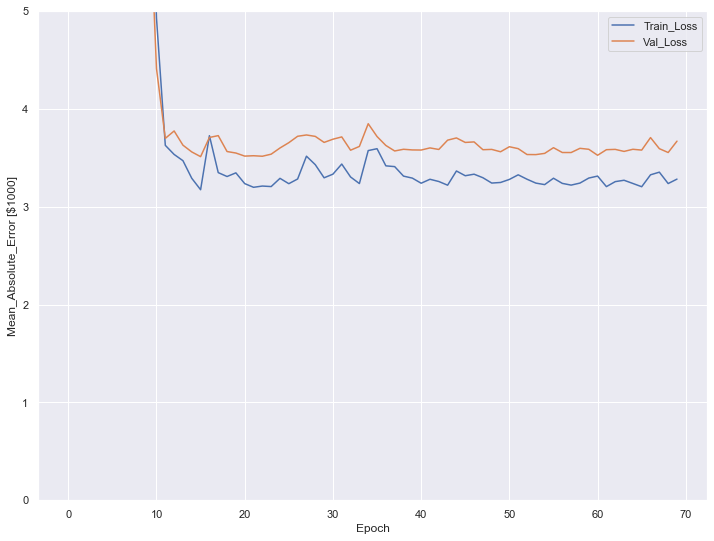

In [67]:
# matplotlib library
import matplotlib.pyplot as plt

# Training the model with Epochs set to 500
EPOCHS = 500

# Display training progress by printing a single dot for each completed epoch
class PrintDot(kr.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0:
            print('')  # change new line every 100 epoch
        print('.', end='')

# The patience parameter is the amount of epochs to check for improvement
# To prevent over-fitting and early callback for stopping
early_stop = kr.callbacks.EarlyStopping(monitor='val_loss', patience=EPOCHS/20)

# Store training stats
history = model.fit(train_data, train_target, epochs=EPOCHS, validation_split=0.2, verbose=0, 
                    callbacks=[early_stop, PrintDot()])

# Define plot_history function for plotting loss graph
def plot_history(history):
    Dict = history.history
    plt.figure()
    plt.figure(figsize=(12, 9))
    plt.xlabel('Epoch')
    plt.ylabel('Mean_Absolute_Error [$1000]')
    plt.plot(history.epoch, np.array(Dict['mean_absolute_error']), label='Train_Loss')
    plt.plot(history.epoch, np.array(Dict['val_mean_absolute_error']), label='Val_Loss')
    plt.legend()
    plt.ylim([0, 5])

plot_history(history)

In [68]:
# Evaluate the test data
[loss, mae] = model.evaluate(test_data, test_target, verbose=1)
print("\nTesting set Mean_Absolute_ Error: ${:7.2f}".format(mae * 1000)

SyntaxError: unexpected EOF while parsing (<ipython-input-68-0f850f595c16>, line 3)

<Figure size 720x720 with 0 Axes>

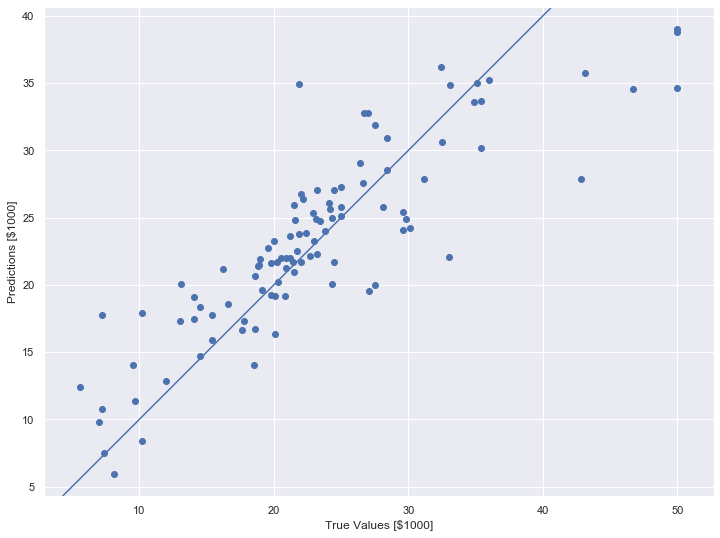

In [69]:
# Prediction the result
test_predictions = model.predict(test_data)
test_predictions = test_predictions.flatten(order='C')

plt.figure()
plt.figure(figsize=(12, 9))
plt.scatter(test_target, test_predictions)
plt.xlabel('True Values [$1000]')
plt.ylabel('Predictions [$1000]')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
plt.plot([-100, 100], [-100, 100])

In [70]:
# Define model
# The first layer has 896: (13+1)*64 parameters
# The second layer has 4160: (64+1)*64 parameters
# The third layer has 65: (64+1)* parameters

m = kr.models.Sequential()
m.add(kr.layers.Dense(64, activation='sigmoid', input_shape=(train_data.shape[1],)))
m.add(kr.layers.Dense(64, activation='linear'))
m.add(kr.layers.Dense(1, activation='linear'))
  
m.compile(loss='mean_squared_error', optimizer='adam') # metrics=['mean_absolute_error'])
    

In [71]:
m.fit(train_data, train_target, epochs=1000, batch_size=10)

Epoch 1/1000
404/404 [==============================] - 0s 420us/step - loss: 400.0679
Epoch 2/1000
404/404 [==============================] - 0s 99us/step - loss: 93.8929
Epoch 3/1000
404/404 [==============================] - 0s 94us/step - loss: 49.3778
Epoch 4/1000
404/404 [==============================] - 0s 106us/step - loss: 43.7084
Epoch 5/1000
404/404 [==============================] - 0s 89us/step - loss: 39.3792
Epoch 6/1000
404/404 [==============================] - 0s 89us/step - loss: 36.0433
Epoch 7/1000
404/404 [==============================] - 0s 89us/step - loss: 33.4368
Epoch 8/1000
404/404 [==============================] - 0s 89us/step - loss: 31.7252
Epoch 9/1000
404/404 [==============================] - 0s 91us/step - loss: 29.8191
Epoch 10/1000
404/404 [==============================] - 0s 99us/step - loss: 28.3489
Epoch 11/1000
404/404 [==============================] - 0s 94us/step - loss: 27.0339
Epoch 12/1000
404/404 [==============================] - 0s 

404/404 [==============================] - 0s 77us/step - loss: 14.2607
Epoch 97/1000
404/404 [==============================] - 0s 74us/step - loss: 13.9954
Epoch 98/1000
404/404 [==============================] - 0s 77us/step - loss: 14.1672
Epoch 99/1000
404/404 [==============================] - 0s 79us/step - loss: 14.1831
Epoch 100/1000
404/404 [==============================] - 0s 74us/step - loss: 13.8620
Epoch 101/1000
404/404 [==============================] - 0s 77us/step - loss: 13.7183
Epoch 102/1000
404/404 [==============================] - 0s 77us/step - loss: 13.4395
Epoch 103/1000
404/404 [==============================] - 0s 77us/step - loss: 13.9011
Epoch 104/1000
404/404 [==============================] - 0s 74us/step - loss: 13.5614
Epoch 105/1000
404/404 [==============================] - 0s 79us/step - loss: 13.1439
Epoch 106/1000
404/404 [==============================] - 0s 74us/step - loss: 12.9264
Epoch 107/1000
404/404 [==============================] - 0s 

404/404 [==============================] - 0s 99us/step - loss: 7.9942
Epoch 191/1000
404/404 [==============================] - 0s 79us/step - loss: 8.0212
Epoch 192/1000
404/404 [==============================] - 0s 77us/step - loss: 7.7802
Epoch 193/1000
404/404 [==============================] - 0s 74us/step - loss: 7.9911
Epoch 194/1000
404/404 [==============================] - 0s 74us/step - loss: 7.9736
Epoch 195/1000
404/404 [==============================] - 0s 74us/step - loss: 7.7696
Epoch 196/1000
404/404 [==============================] - 0s 74us/step - loss: 7.8590
Epoch 197/1000
404/404 [==============================] - 0s 77us/step - loss: 7.6903
Epoch 198/1000
404/404 [==============================] - 0s 74us/step - loss: 8.5580
Epoch 199/1000
404/404 [==============================] - 0s 74us/step - loss: 7.8135
Epoch 200/1000
404/404 [==============================] - 0s 77us/step - loss: 7.9198
Epoch 201/1000
404/404 [==============================] - 0s 77us/ste

404/404 [==============================] - 0s 128us/step - loss: 6.3022
Epoch 286/1000
404/404 [==============================] - 0s 111us/step - loss: 6.3576
Epoch 287/1000
404/404 [==============================] - ETA: 0s - loss: 10.85 - 0s 94us/step - loss: 6.2112
Epoch 288/1000
404/404 [==============================] - 0s 84us/step - loss: 6.4370
Epoch 289/1000
404/404 [==============================] - 0s 91us/step - loss: 6.3773
Epoch 290/1000
404/404 [==============================] - 0s 84us/step - loss: 6.3752
Epoch 291/1000
404/404 [==============================] - 0s 86us/step - loss: 6.5102
Epoch 292/1000
404/404 [==============================] - 0s 84us/step - loss: 6.1080
Epoch 293/1000
404/404 [==============================] - 0s 77us/step - loss: 6.7150
Epoch 294/1000
404/404 [==============================] - 0s 81us/step - loss: 6.6311
Epoch 295/1000
404/404 [==============================] - 0s 77us/step - loss: 6.5933
Epoch 296/1000
404/404 [===================

404/404 [==============================] - 0s 96us/step - loss: 5.3468
Epoch 381/1000
404/404 [==============================] - 0s 123us/step - loss: 5.7375
Epoch 382/1000
404/404 [==============================] - 0s 121us/step - loss: 5.3691
Epoch 383/1000
404/404 [==============================] - 0s 91us/step - loss: 5.1915
Epoch 384/1000
404/404 [==============================] - 0s 84us/step - loss: 5.2977
Epoch 385/1000
404/404 [==============================] - 0s 84us/step - loss: 5.3127
Epoch 386/1000
404/404 [==============================] - 0s 79us/step - loss: 5.2633
Epoch 387/1000
404/404 [==============================] - ETA: 0s - loss: 2.522 - 0s 79us/step - loss: 5.2127
Epoch 388/1000
404/404 [==============================] - 0s 77us/step - loss: 5.4735
Epoch 389/1000
404/404 [==============================] - 0s 79us/step - loss: 5.0786
Epoch 390/1000
404/404 [==============================] - 0s 81us/step - loss: 5.1175
Epoch 391/1000
404/404 [===================

404/404 [==============================] - 0s 81us/step - loss: 4.6114
Epoch 476/1000
404/404 [==============================] - 0s 91us/step - loss: 5.1871
Epoch 477/1000
404/404 [==============================] - 0s 114us/step - loss: 4.7064
Epoch 478/1000
404/404 [==============================] - 0s 114us/step - loss: 4.5587
Epoch 479/1000
404/404 [==============================] - 0s 77us/step - loss: 4.8066
Epoch 480/1000
404/404 [==============================] - 0s 72us/step - loss: 4.5618
Epoch 481/1000
404/404 [==============================] - 0s 77us/step - loss: 4.6351
Epoch 482/1000
404/404 [==============================] - 0s 79us/step - loss: 4.7736
Epoch 483/1000
404/404 [==============================] - 0s 72us/step - loss: 4.6723
Epoch 484/1000
404/404 [==============================] - 0s 74us/step - loss: 4.6375
Epoch 485/1000
404/404 [==============================] - 0s 79us/step - loss: 4.5413
Epoch 486/1000
404/404 [==============================] - 0s 79us/s

404/404 [==============================] - 0s 81us/step - loss: 4.2132
Epoch 571/1000
404/404 [==============================] - 0s 77us/step - loss: 4.2686
Epoch 572/1000
404/404 [==============================] - 0s 79us/step - loss: 4.1200
Epoch 573/1000
404/404 [==============================] - 0s 89us/step - loss: 4.1394
Epoch 574/1000
404/404 [==============================] - 0s 118us/step - loss: 4.0374
Epoch 575/1000
404/404 [==============================] - 0s 114us/step - loss: 4.0555
Epoch 576/1000
404/404 [==============================] - 0s 89us/step - loss: 4.5662
Epoch 577/1000
404/404 [==============================] - 0s 77us/step - loss: 4.5054
Epoch 578/1000
404/404 [==============================] - 0s 74us/step - loss: 4.4553
Epoch 579/1000
404/404 [==============================] - 0s 74us/step - loss: 4.6797
Epoch 580/1000
404/404 [==============================] - 0s 81us/step - loss: 4.0455
Epoch 581/1000
404/404 [==============================] - 0s 74us/s

404/404 [==============================] - 0s 77us/step - loss: 3.7461
Epoch 666/1000
404/404 [==============================] - 0s 77us/step - loss: 3.7117
Epoch 667/1000
404/404 [==============================] - 0s 74us/step - loss: 3.8889
Epoch 668/1000
404/404 [==============================] - 0s 77us/step - loss: 3.7781
Epoch 669/1000
404/404 [==============================] - 0s 72us/step - loss: 3.9350
Epoch 670/1000
404/404 [==============================] - 0s 79us/step - loss: 3.9415
Epoch 671/1000
404/404 [==============================] - 0s 77us/step - loss: 3.7269
Epoch 672/1000
404/404 [==============================] - 0s 79us/step - loss: 3.6343
Epoch 673/1000
404/404 [==============================] - 0s 77us/step - loss: 3.9085
Epoch 674/1000
404/404 [==============================] - 0s 86us/step - loss: 3.6870
Epoch 675/1000
404/404 [==============================] - 0s 104us/step - loss: 3.6930
Epoch 676/1000
404/404 [==============================] - 0s 109us/s

404/404 [==============================] - 0s 79us/step - loss: 3.3131
Epoch 761/1000
404/404 [==============================] - 0s 79us/step - loss: 3.4556
Epoch 762/1000
404/404 [==============================] - 0s 89us/step - loss: 3.2109
Epoch 763/1000
404/404 [==============================] - 0s 79us/step - loss: 3.2987
Epoch 764/1000
404/404 [==============================] - 0s 77us/step - loss: 3.6419
Epoch 765/1000
404/404 [==============================] - 0s 74us/step - loss: 3.4149
Epoch 766/1000
404/404 [==============================] - 0s 77us/step - loss: 3.2732
Epoch 767/1000
404/404 [==============================] - 0s 77us/step - loss: 3.2848
Epoch 768/1000
404/404 [==============================] - 0s 77us/step - loss: 3.2240
Epoch 769/1000
404/404 [==============================] - 0s 74us/step - loss: 3.2784
Epoch 770/1000
404/404 [==============================] - 0s 77us/step - loss: 3.3387
Epoch 771/1000
404/404 [==============================] - 0s 77us/ste

404/404 [==============================] - 0s 84us/step - loss: 3.0991
Epoch 856/1000
404/404 [==============================] - 0s 89us/step - loss: 3.0369
Epoch 857/1000
404/404 [==============================] - 0s 84us/step - loss: 3.1909
Epoch 858/1000
404/404 [==============================] - 0s 84us/step - loss: 2.9120
Epoch 859/1000
404/404 [==============================] - 0s 84us/step - loss: 3.0971
Epoch 860/1000
404/404 [==============================] - 0s 86us/step - loss: 3.0695
Epoch 861/1000
404/404 [==============================] - 0s 84us/step - loss: 3.2566
Epoch 862/1000
404/404 [==============================] - 0s 84us/step - loss: 3.0240
Epoch 863/1000
404/404 [==============================] - 0s 77us/step - loss: 2.9479
Epoch 864/1000
404/404 [==============================] - 0s 79us/step - loss: 2.9939
Epoch 865/1000
404/404 [==============================] - 0s 79us/step - loss: 3.3352
Epoch 866/1000
404/404 [==============================] - 0s 84us/ste

404/404 [==============================] - 0s 81us/step - loss: 2.8539
Epoch 950/1000
404/404 [==============================] - 0s 81us/step - loss: 2.5934
Epoch 951/1000
404/404 [==============================] - 0s 79us/step - loss: 3.0532
Epoch 952/1000
404/404 [==============================] - 0s 79us/step - loss: 2.6879
Epoch 953/1000
404/404 [==============================] - 0s 91us/step - loss: 2.7171
Epoch 954/1000
404/404 [==============================] - 0s 116us/step - loss: 2.9595
Epoch 955/1000
404/404 [==============================] - 0s 104us/step - loss: 2.6918
Epoch 956/1000
404/404 [==============================] - 0s 94us/step - loss: 2.6256
Epoch 957/1000
404/404 [==============================] - 0s 101us/step - loss: 2.5659
Epoch 958/1000
404/404 [==============================] - 0s 104us/step - loss: 2.8078
Epoch 959/1000
404/404 [==============================] - 0s 94us/step - loss: 2.6824
Epoch 960/1000
404/404 [==============================] - 0s 86us

In [72]:
m.predict(train_data)

array([[17.033033 ],
       [15.381279 ],
       [16.42415  ],
       [14.173942 ],
       [43.29679  ],
       [22.2863   ],
       [18.501797 ],
       [13.924589 ],
       [19.150524 ],
       [ 8.8076315],
       [22.930872 ],
       [10.761502 ],
       [18.278742 ],
       [28.901196 ],
       [24.022205 ],
       [13.487721 ],
       [19.538767 ],
       [23.17569  ],
       [20.737013 ],
       [15.538868 ],
       [31.007717 ],
       [24.419834 ],
       [12.464535 ],
       [18.538012 ],
       [23.23228  ],
       [22.487593 ],
       [ 9.718019 ],
       [44.557434 ],
       [22.735708 ],
       [49.925102 ],
       [11.405412 ],
       [22.659958 ],
       [17.504543 ],
       [30.89491  ],
       [11.1965685],
       [29.62986  ],
       [19.79961  ],
       [18.559538 ],
       [34.235245 ],
       [17.984158 ],
       [13.024419 ],
       [20.94706  ],
       [31.42186  ],
       [22.940983 ],
       [10.237526 ],
       [14.743318 ],
       [21.903133 ],
       [21.41

In [ ]:
df.describe()

In [ ]:
# split into input (X) and output (Y) variables
X = df[:,0:13]
Y = df[:,13]

# Conclusion

# References
http://www.neural.cz/dataset-exploration-boston-house-pricing.html
https://subscription.packtpub.com/book/big_data_and_business_intelligence/9781789804744/1/ch01lvl1sec11/our-first-analysis-the-boston-housing-dataset
https://www.thoughtco.com/analysis-of-variance-anova-3026693
https://github.com/mick1997/Boston-Housing-Prices-Predication/blob/master/Boston%20Housing%20Prices%20Predication%20by%20Neural%20Net%20(Keras%20Deep%20Learning).ipynb
https://skymind.ai/wiki/neural-network#define
https://www.getsmarter.com/blog/career-advice/how-artificial-neural-networks-can-be-used-for-data-mining/